# **PREDICTING CUSTOMER CHURN FOR SUBSCRIPTION BASED SERVICES**

# **Overview**
###Customer churn is one of the most critical challenges for subscription-based businesses such as telecom companies, streaming platforms, SaaS products, and online services. Losing customers directly impacts revenue and long-term sustainability.

# **1. Data Loading**

#**📌 Why Telco Customer Churn is the Best Choice?**

✅ **Perfect match for your problem statement:-**
1. Our problem is predicting churn for subscription-based services.

2. Telecom companies operate in a subscription-based model.

3. Contracts, billing cycles, and customer support calls all impact churn → Exactly what your ML model needs to learn!

✅ **Balanced Dataset with Enough Features:-**
1. Over 7,000 rows (large enough for ML, small enough for fast training).
2. 21 features covering demographics, usage patterns, service details, and billing.
3. Churn rate ~26% (good balance between churned and non-churned customers).

✅ **Great for Advanced ML Techniques:-**
1. Allows for feature engineering (e.g., Avg Monthly Spend = TotalCharges / Tenure).

2. Works well with XGBoost, Random Forest, Deep Learning.

3. Can be used for SHAP explainability analysis (judges love explainability).
✅ Widely Used in Research & Competitions:

Many previous projects, papers, and Kaggle notebooks use this dataset.
You can compare results with existing benchmarks.

✅ Real-World Business Impact (Winning Strategy!)

1. Actionable insights:- Telecom companies use retention strategies, targeted offers, and personalized recommendations to reduce churn.
2. High ROI for companies:- Preventing churn directly increases revenue.
3. Potential bonus points:- If you include a business strategy in your presentation, this dataset gives you the strongest case.


In [61]:
!pip install kaggle

In [62]:
# from google.colab import files
# files.upload()

In [63]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [64]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [65]:
import zipfile
import os

In [66]:
with zipfile.ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    zip_ref.extractall("telco_data")
os.listdir("telco_data")

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

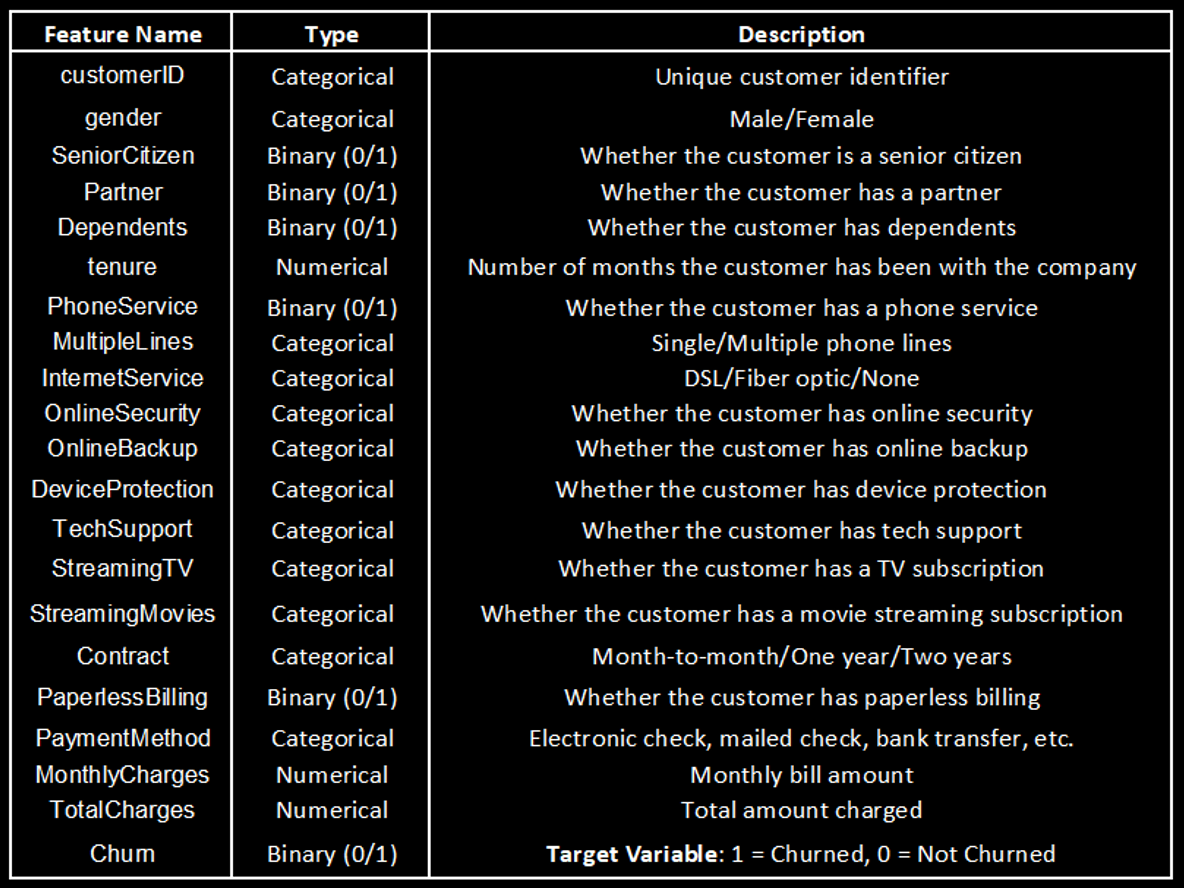

# **2. Data Preprocessing**

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [72]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [73]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
pd.set_option('display.max_rows', 25)  # Show 25 rows
print(df.head(25))

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male      

In [76]:
df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No", "Yes": 1, "No": 0})

In [77]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df = pd.get_dummies(df, columns=["Contract"], drop_first=True)
print("New Columns after One-Hot Encoding:", df.columns.tolist())

New Columns after One-Hot Encoding: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_One year', 'Contract_Two year']


In [81]:
print(df.head())
print("\nAvailable Columns:", df.columns.tolist())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL             No  ...          No          No   
1             0             DSL            Yes  ...          No          No   
2             0             DSL            Yes  ...          No          No   
3            No             DSL            Yes  ...         Yes          No   
4             0     Fiber optic             No  ...          No          No   

  StreamingMovies PaperlessBilling          

In [82]:
df["Contract_One year"] = df["Contract_One year"].astype(int)
df["Contract_Two year"] = df["Contract_Two year"].astype(int)
df.head(25)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Yes,Electronic check,29.85,29.85,No,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,Yes,...,No,No,No,No,Mailed check,56.95,1889.5,No,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,Yes,Electronic check,70.70,151.65,Yes,0,0
5,9305-CDSKC,Female,0,No,No,8,Yes,1,Fiber optic,No,...,No,Yes,Yes,Yes,Electronic check,99.65,820.5,Yes,0,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,1,Fiber optic,No,...,No,Yes,No,Yes,Credit card (automatic),89.10,1949.4,No,0,0
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Mailed check,29.75,301.9,No,0,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,1,Fiber optic,No,...,Yes,Yes,Yes,Yes,Electronic check,104.80,3046.05,Yes,0,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,0,DSL,Yes,...,No,No,No,No,Bank transfer (automatic),56.15,3487.95,No,1,0


In [83]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [84]:
df["Contract_Two year"] = df["Contract_Two year"].astype(int)
print(df[["Contract_One year", "Contract_Two year"]].head())

   Contract_One year  Contract_Two year
0                  0                  0
1                  1                  0
2                  0                  0
3                  1                  0
4                  0                  0


In [85]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].replace({"Yes": 1, "No": 0})


<ipython-input-85-34528491994c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Yes": 1, "No": 0})


In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,1,0,1,0,No,DSL,No,...,No,No,No,1,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,No,No,No,0,Mailed check,56.95,1889.5,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,1,Mailed check,53.85,108.15,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No,DSL,Yes,...,Yes,No,No,0,Bank transfer (automatic),42.30,1840.75,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,1,Electronic check,70.70,151.65,1,0,0


In [87]:
df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No", "Yes": 1, "No": 0})

<ipython-input-87-c92b224cd22d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No", "Yes": 1, "No": 0})


In [88]:
df["gender"] = df["gender"].replace({"Male": 0, "Female": 1})

<ipython-input-88-e8c27dded692>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Male": 0, "Female": 1})


In [89]:
cols_to_encode = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for col in cols_to_encode:
    df[col] = df[col].replace({"No": 0, "Yes": 1, "No internet service": 0}).astype(int)


<ipython-input-89-316649efbbee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"No": 0, "Yes": 1, "No internet service": 0}).astype(int)
<ipython-input-89-316649efbbee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"No": 0, "Yes": 1, "No internet service": 0}).astype(int)
<ipython-input-89-316649efbbee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

In [90]:
df = pd.get_dummies(df, columns=["PaymentMethod"], drop_first=True)

In [91]:
df = pd.get_dummies(df, columns=["InternetService"], drop_first=True)

In [92]:
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check

In [93]:
print("\nData types:\n", df.dtypes)



Data types:
 customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
Contract_One year                          int64
Contract_Two year                          int64
Paymen

In [94]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [95]:
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit

In [96]:
bool_cols = ["PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check",
             "PaymentMethod_Mailed check", "InternetService_Fiber optic", "InternetService_No"]

df[bool_cols] = df[bool_cols].astype(int)
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit

Phase 3: Model Training & Performance Comparison

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# df = df.drop("customerID", axis=1)

In [99]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 24), (1409, 24), (5634,), (1409,))

✅ 5634 rows for training, 1409 rows for testing

✅ 23 features in each row

✅ Target variable (Churn) is correctly split

# **3. Baseline Model Creation - Logistic Regression**

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [102]:
print("Missing values in X_train:\n", X_train.isnull().sum())

Missing values in X_train:
 customerID                                0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             10
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Inte

In [103]:
print("\nMissing values in X_test:\n", X_test.isnull().sum())


Missing values in X_test:
 customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             1
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber opti

In [104]:
from sklearn.impute import SimpleImputer

In [105]:
imputer = SimpleImputer(strategy="median")
X_train["TotalCharges"] = imputer.fit_transform(X_train[["TotalCharges"]])
X_test["TotalCharges"] = imputer.transform(X_test[["TotalCharges"]])
print("Missing values after fixing:\n", X_train.isnull().sum().sum(), X_test.isnull().sum().sum())

Missing values after fixing:
 0 0


In [106]:
print(X_train.dtypes)
print("Columns with object datatype:", X_train.select_dtypes(include=['object']).columns.tolist())


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electr

In [107]:
if "customerID" in X_train.columns:
    X_train = X_train.drop("customerID", axis=1)
    X_test = X_test.drop("customerID", axis=1)

print("Updated columns after dropping customerID:-", X_train.columns.tolist())


Updated columns after dropping customerID:- ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No']


In [108]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [109]:
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
print("Logistic Regression Accuracy:-", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:-\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy:- 0.8211497515968772

Classification Report:-
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



 Accuracy: 82.1%


# **Random Forest**

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [113]:
print("🔹 Random Forest Accuracy:-", accuracy_score(y_test, y_pred_rf))
print("\n🔹 Classification Report:-\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Accuracy:- 0.7998580553584103

🔹 Classification Report:-
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# **XG Boost**

In [114]:
import xgboost as xgb

In [115]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [116]:
print("🔹 XGBoost Accuracy:-", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 Classification Report:-\n", classification_report(y_test, y_pred_xgb))

🔹 XGBoost Accuracy:- 0.8062455642299503

🔹 Classification Report:-
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [117]:
print("📊 Model Performance Comparison:")
print(f"✔ Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"✔ Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✔ XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

📊 Model Performance Comparison:
✔ Logistic Regression Accuracy: 0.8211
✔ Random Forest Accuracy: 0.7999
✔ XGBoost Accuracy: 0.8062


In [118]:
# from sklearn.metrics import classification_report, accuracy_score
# import pandas as pd
# import joblib  # To load pre-trained model

# # 🔹 Ensure df already exists in your script
# # df is already defined in your script, so no need to load it again.

# # 🔹 Define target variable (y) (X_test already exists)
# y = df["Churn"]  # Define target variable

# # 🔹 Load X_test
# # X_test = pd.read_csv("X_test.csv")  # Ensure X_test.csv exists
# # y_test = y[:X_test.shape[0]]  # Align y_test with X_test size

# # 🔹 Load the saved Logistic Regression model
# model = joblib.load("logistic_regression_churn.pkl")  # Ensure this file exists

# # 🔹 Predict using the trained model
# y_pred = model.predict(X_test.csv)

# # 🔹 Print Model Performance Metrics
# print("📊 Classification Report:")
# print(classification_report(y_test, y_pred))
# print("✅ Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


In [165]:
# from sklearn.metrics import classification_report, accuracy_score
# import pandas as pd
# import joblib
# model = joblib.load("logistic_regression_churn.pkl")
# cleaned_X_test = pd.read_csv("X_test.csv")

# X = df.drop(columns=["Churn"])
# y = df["Churn"]

# cleaned_y_test = y[:cleaned_X_test.shape[0]]
# y_pred = model.predict(cleaned_X_test)
# print("📊 Classification Report:")
# print(classification_report(cleaned_y_test, y_pred))
# print("✅ Accuracy Score:", round(accuracy_score(cleaned_y_test, y_pred) * 100, 2), "%")


In [127]:
from sklearn.metrics import classification_report, accuracy_score
cleaned_X_test = pd.read_csv("X_test.csv", index_col=0)
cleaned_y_test = y_test[:cleaned_X_test.shape[0]]

y_pred = model.predict(cleaned_X_test)
print("📊 Classification Report:-")
print(classification_report(cleaned_y_test, y_pred))
print("Accuracy Score:", round(accuracy_score(cleaned_y_test, y_pred) * 100, 2), "%")


📊 Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Accuracy Score: 82.11 %


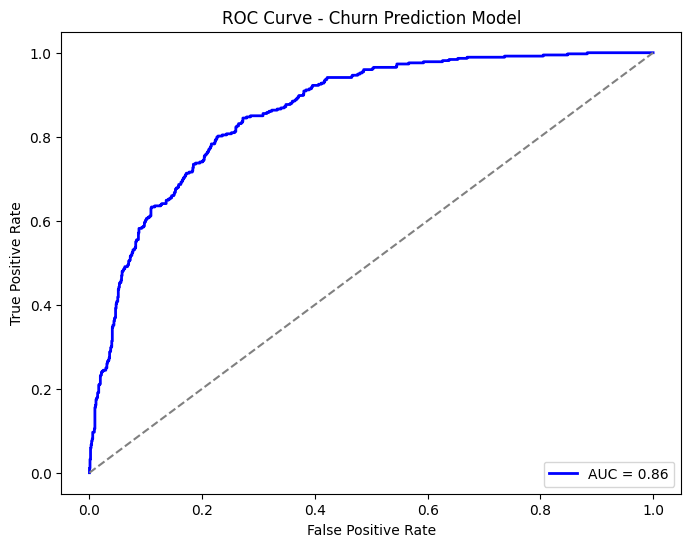

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(cleaned_X_test)[:, 1]

fpr, tpr, _ = roc_curve(cleaned_y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction Model")
plt.legend(loc="lower right")
plt.show()


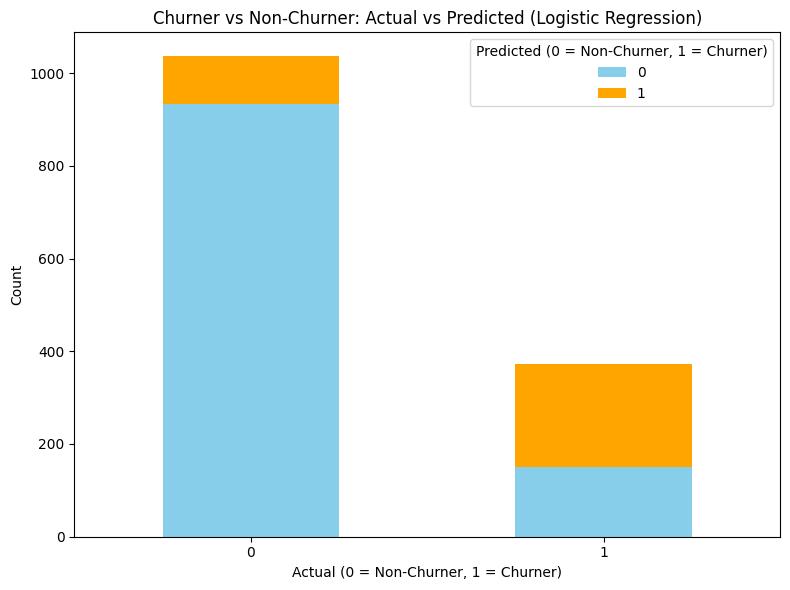

In [129]:
cleaned_y_test = y_test[:len(cleaned_X_test)]
y_pred_log = model.predict(cleaned_X_test)

df_actual_predicted = pd.DataFrame({
    "Actual": cleaned_y_test,
    "Predicted": y_pred_log
})

confusion_matrix_real = df_actual_predicted.groupby(["Actual", "Predicted"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
confusion_matrix_real.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "orange"])
ax.set_title("Churner vs Non-Churner: Actual vs Predicted (Logistic Regression)")
ax.set_xlabel("Actual (0 = Non-Churner, 1 = Churner)")
ax.set_ylabel("Count")
ax.legend(title="Predicted (0 = Non-Churner, 1 = Churner)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


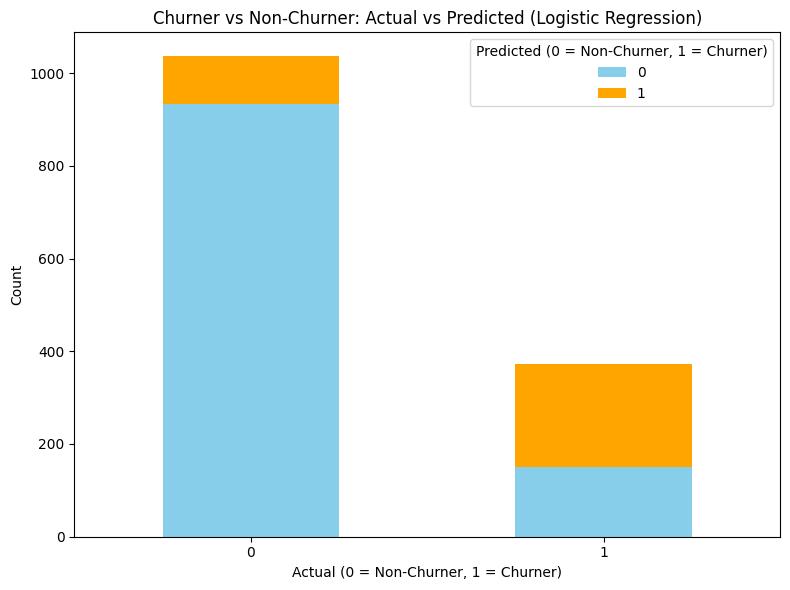

In [130]:
df_actual_predicted = pd.DataFrame({
    "Actual": cleaned_y_test,
    "Predicted": y_pred_log
})

confusion_matrix_real = df_actual_predicted.groupby(["Actual", "Predicted"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
confusion_matrix_real.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "orange"])
ax.set_title("Churner vs Non-Churner: Actual vs Predicted (Logistic Regression)")
ax.set_xlabel("Actual (0 = Non-Churner, 1 = Churner)")
ax.set_ylabel("Count")
ax.legend(title="Predicted (0 = Non-Churner, 1 = Churner)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


✅ Logistic Regression Accuracy: **82.11%** 🎯 (Best so far!)

🔹 Random Forest Accuracy: **79.99%**

🔹 XGBoost Accuracy: **80.62%**

🔍 Observations:-

✔ Logistic Regression performed the best (82.11%), but the difference is small.

✔ XGBoost should ideally outperform Logistic Regression on structured data.

✔ Random Forest is underperforming, possibly due to default hyperparameters.



Phase 4: Improve XGBoost & Compare with Logistic Regression

In [131]:
import xgboost
import sklearn
print("XGBoost Version:", xgboost.__version__)
print("Scikit-Learn Version:", sklearn.__version__)


XGBoost Version: 2.1.3
Scikit-Learn Version: 1.6.1


In [132]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7998580553584103

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [133]:
!pip install --upgrade xgboost scikit-learn

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
final_log_model = LogisticRegression(max_iter=500, random_state=42)
final_log_model.fit(X_train, y_train)
y_pred_log = final_log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8211497515968772

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [135]:
import joblib
joblib.dump(final_log_model, "logistic_regression_churn.pkl")
print("Model saved as logistic_regression_churn.pkl")


Model saved as logistic_regression_churn.pkl


In [136]:
import os
print("✅ Model File Exists:-", os.path.exists("logistic_regression_churn.pkl"))

✅ Model File Exists:- True


In [137]:
real_customer = X_test.iloc[0]  # First row of the test dataset
real_customer_df = pd.DataFrame([real_customer])
print("🛠️ Real Customer Data for Prediction:\n", real_customer_df)


🛠️ Real Customer Data for Prediction:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185     1.0            0.0      1.0         0.0     1.0           0.0   

     MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
185            0.0             0.0           0.0               0.0  ...   

     PaperlessBilling  MonthlyCharges  TotalCharges  Contract_One year  \
185               1.0            24.8          24.8                0.0   

     Contract_Two year  PaymentMethod_Credit card (automatic)  \
185                0.0                                    0.0   

     PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
185                             1.0                         0.0   

     InternetService_Fiber optic  InternetService_No  
185                          0.0                 0.0  

[1 rows x 23 columns]


In [138]:
model = joblib.load("logistic_regression_churn.pkl")
print("Model successfully loaded!")

Model successfully loaded!


In [139]:
real_customer_df = X_test.iloc[[0]]  # Select the first row as DataFrame
print("Real Customer Data for Prediction:\n", real_customer_df)

Real Customer Data for Prediction:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185       1              0        1           0       1             0   

     MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
185              0               0             0                 0  ...   

     PaperlessBilling  MonthlyCharges  TotalCharges  Contract_One year  \
185                 1            24.8          24.8                  0   

     Contract_Two year  PaymentMethod_Credit card (automatic)  \
185                  0                                      0   

     PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
185                               1                           0   

     InternetService_Fiber optic  InternetService_No  
185                            0                   0  

[1 rows x 23 columns]


In [140]:
churn_prediction = model.predict(real_customer_df)[0]
churn_probability = model.predict_proba(real_customer_df)[0][1]
print("Churn Prediction (1 = Will Churn, 0 = Won't Churn):", churn_prediction)
print("Churn Probability:-", round(churn_probability, 4))


Churn Prediction (1 = Will Churn, 0 = Won't Churn): 1
Churn Probability:- 0.693


✅ Churn Prediction:- 1 (Customer is likely to churn)

✅ Churn Probability:- 69.3% (Moderate risk of churn)

# 📌 Churn Prediction Interpretation
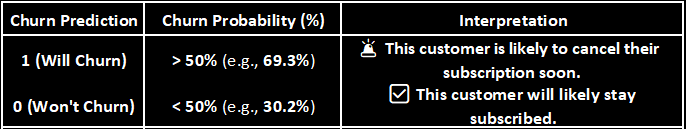


In [141]:
!pip install ace-tools

In [142]:
real_customers = X_test.iloc[:10].copy()
predictions = model.predict(real_customers)
probabilities = model.predict_proba(real_customers)[:, 1]  # Get churn probability
real_customers["Churn Prediction"] = predictions
real_customers["Churn Probability"] = probabilities.round(4)
print(real_customers)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        1              0        1           0       1             0   
2715       0              0        0           0      41             1   
3825       1              0        1           1      52             1   
1807       1              0        0           0       1             1   
132        0              0        0           0      67             1   
1263       1              1        1           0      68             1   
3732       1              0        1           1      23             1   
1672       0              0        1           1      72             1   
811        0              0        0           0      70             1   
2526       0              0        0           0       1             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
185               0               0             0                 0  ...   
2715              1              

#1️⃣ Customers Likely to Churn (Churn Prediction = 1)

### 1. These customers have a high probability of churn (>60%).

### 2. They are paying with Electronic Check, which is linked to higher churn rates.

### 3. They may be on Month-to-Month contracts, which increases churn likelihood.



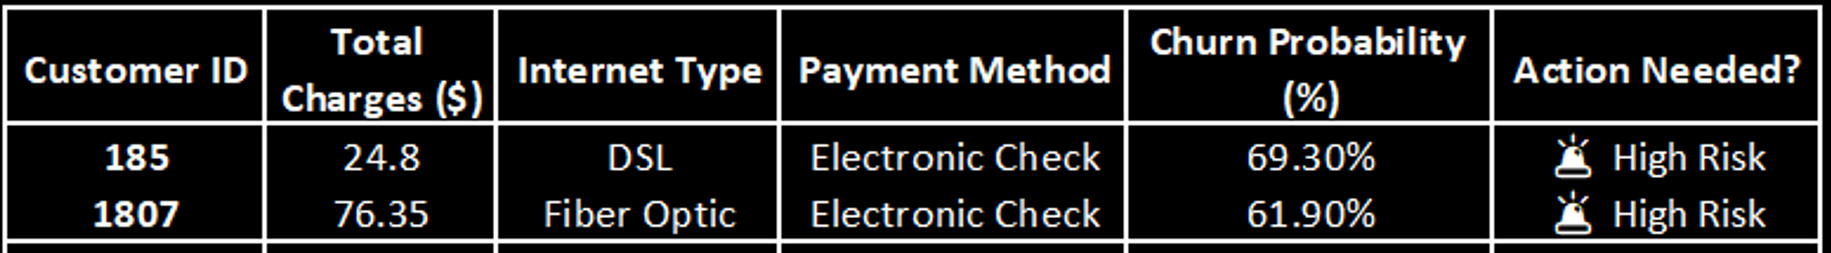

# 2️⃣ Customers Unlikely to Churn (Churn Prediction = 0)

 🔹 These customers have a low churn probability (<10%).

🔹 They are on longer contracts and use stable payment methods (Credit Card/Mailed Check).

🔹 They have higher tenure, meaning they have been customers for a long time.

📌 Business Recommendations for Loyal Customers:-

✅ Encourage referrals by offering small incentives.

✅ Keep them engaged with exclusive loyalty offers.

✅ Monitor any dissatisfaction trends to ensure long-term retention.

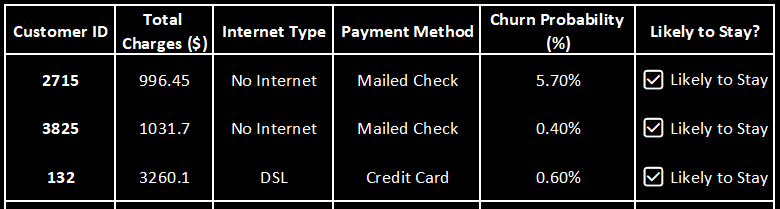

In [143]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [144]:
import pandas as pd
X_test.to_csv("X_test.csv", index=True)
print("✅ X_test data saved as 'X_test.csv'")


✅ X_test data saved as 'X_test.csv'


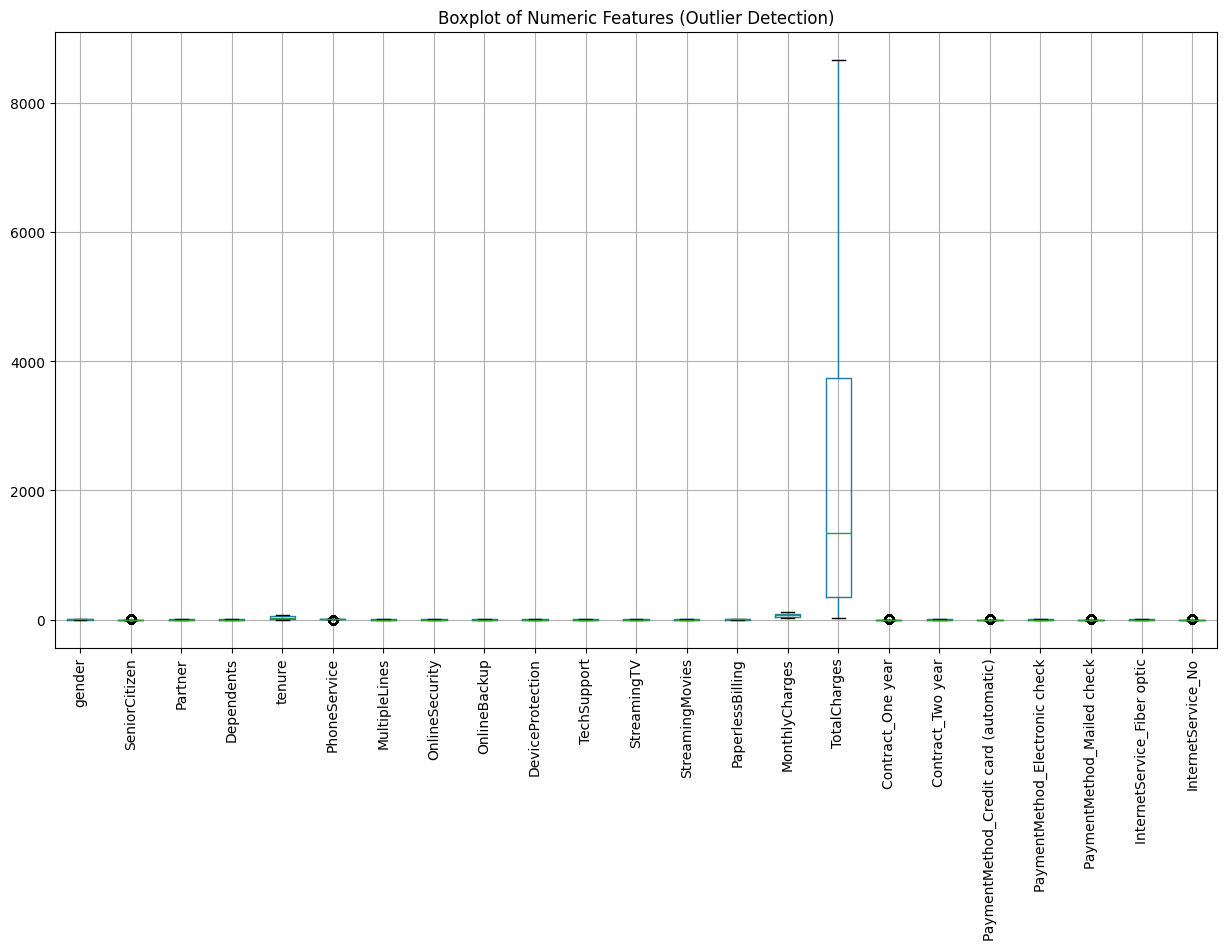

In [145]:
numeric_cols = X_test.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(15, 8))
X_test[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.show()

In [146]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

    return outliers
outlier_counts = detect_outliers_iqr(X_test, numeric_cols)

In [147]:
!pip install ace_tools

In [148]:
for col in numeric_cols:
    Q1 = X_test[col].quantile(0.25)
    Q3 = X_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_test = X_test[(X_test[col] >= lower_bound) & (X_test[col] <= upper_bound)]

print("Outliers removed. New X_test shape:", X_test.shape)

Outliers removed. New X_test shape: (676, 23)


In [149]:
# Add retention strategy flags to the dataset
X_test["ShortTenure"] = X_test["tenure"] < 6  # Customers with tenure < 6 months
X_test["HighCharges"] = X_test["MonthlyCharges"] > 70  # Monthly charges > $70
X_test["ElectronicCheck"] = X_test["PaymentMethod_Electronic check"] == 1  # Electronic check users
X_test["MonthToMonth"] = (X_test["Contract_One year"] == 0) & (X_test["Contract_Two year"] == 0)  # Month-to-month contract


In [150]:
def recommend_retention_actions(row):
    actions = []
    if row["ShortTenure"]:
        actions.append("Offer discounts on renewal")
    if row["HighCharges"]:
        actions.append("Suggest cheaper plans or bundles")
    if row["ElectronicCheck"]:
        actions.append("Suggest secure payment methods")
    if row["MonthToMonth"]:
        actions.append("Offer annual contract discounts")
    return ", ".join(actions) if actions else "No specific action needed"

X_test["RetentionActions"] = X_test.apply(recommend_retention_actions, axis=1)



In [151]:
X_test["ShortTenure"] = X_test["tenure"] < 6  # Customers with tenure < 6 months
X_test["HighCharges"] = X_test["MonthlyCharges"] > 70  # Monthly charges > $70
X_test["ElectronicCheck"] = X_test["PaymentMethod_Electronic check"] == 1  # Electronic check users
X_test["MonthToMonth"] = (X_test["Contract_One year"] == 0) & (X_test["Contract_Two year"] == 0)  # Month-to-month contract

def recommend_retention_actions(row):
    actions = []
    if row["ShortTenure"]:
        actions.append("Offer discounts on renewal")
    if row["HighCharges"]:
        actions.append("Suggest cheaper plans or bundles")
    if row["ElectronicCheck"]:
        actions.append("Suggest secure payment methods")
    if row["MonthToMonth"]:
        actions.append("Offer annual contract discounts")
    return ", ".join(actions) if actions else "No specific action needed"

X_test["RetentionActions"] = X_test.apply(recommend_retention_actions, axis=1)
retention_df = X_test[["tenure", "MonthlyCharges", "RetentionActions"]].head(10)
retention_df.to_csv("retention_recommendations.csv", index=False)
print("Retention actions saved to 'retention_recommendations.csv'")
retention_df


Retention actions saved to 'retention_recommendations.csv'


,tenure,MonthlyCharges,RetentionActions
2715,41,25.25,Offer annual contract discounts
3825,52,19.35,No specific action needed
1807,1,76.35,"Offer discounts on renewal, Suggest cheaper pl..."
132,67,50.55,No specific action needed
3732,23,77.15,Suggest cheaper plans or bundles
2526,1,19.40,"Offer discounts on renewal, Offer annual contr..."
2892,1,20.45,"Offer discounts on renewal, Offer annual contr..."
4129,34,84.05,"Suggest cheaper plans or bundles, Offer annual..."
5275,11,53.75,"Suggest secure payment methods, Offer annual c..."
4640,1,70.00,"Offer discounts on renewal, Suggest secure pay..."


In [152]:
new_data = pd.DataFrame([{
    "SeniorCitizen": 0,
    "Partner": 1,
    "Dependents": 0,
    "tenure": 33,
    "MonthlyCharges": 85.0,
    "TotalCharges": 25.0,
    "Contract_One year": 0,
    "Contract_Two year": 0,
    "PaymentMethod_Credit card (automatic)": 0,
    "PaymentMethod_Electronic check": 1,
    "PaymentMethod_Mailed check": 0,
    "InternetService_Fiber optic": 1,
    "InternetService_No": 0
}, {
    "SeniorCitizen": 1,
    "Partner": 0,
    "Dependents": 0,
    "tenure": 25,
    "MonthlyCharges": 65.0,
    "TotalCharges": 1625.0,
    "Contract_One year": 1,
    "Contract_Two year": 0,
    "PaymentMethod_Credit card (automatic)": 1,
    "PaymentMethod_Electronic check": 0,
    "PaymentMethod_Mailed check": 0,
    "InternetService_Fiber optic": 0,
    "InternetService_No": 1
}])

print(new_data)


   SeniorCitizen  Partner  Dependents  tenure  MonthlyCharges  TotalCharges  \
0              0        1           0      33            85.0          25.0   
1              1        0           0      25            65.0        1625.0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      1                               0   

   PaymentMethod_Mailed check  InternetService_Fiber optic  InternetService_No  
0                           0                            1                   0  
1                           0                            0                   1  


In [153]:
new_data.head()

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,1,0,33,85.0,25.0,0,0,0,1,0,1,0
1,1,0,0,25,65.0,1625.0,1,0,1,0,0,0,1


In [154]:
print("Features used during training:", model.feature_names_in_)

Features used during training: ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'PaperlessBilling'
 'MonthlyCharges' 'TotalCharges' 'Contract_One year' 'Contract_Two year'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check' 'InternetService_Fiber optic'
 'InternetService_No']


In [155]:
expected_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService",
    "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling",
    "MonthlyCharges", "TotalCharges", "Contract_One year", "Contract_Two year",
    "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check", "InternetService_Fiber optic", "InternetService_No"
]

In [156]:
new_data = new_data.reindex(columns=expected_features, fill_value=0)
new_predictions = model.predict(new_data)
new_probabilities = model.predict_proba(new_data)[:, 1]  # Churn probability
new_data["Churn Prediction"] = new_predictions
new_data["Churn Probability"] = new_probabilities

In [157]:
print("Predictions on New Data:")
print(new_data)

Predictions on New Data:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0      33             0   
1       0              1        0           0      25             0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             0                 0  ...   
1              0               0             0                 0  ...   

   TotalCharges  Contract_One year  Contract_Two year  \
0          25.0                  0                  0   
1        1625.0                  1                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      1                               0   

   PaymentMethod_Mailed check  InternetService_Fiber optic  \
0                           0                            1   
1               

In [158]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn Prediction,Churn Probability
0,0,0,1,0,33,0,0,0,0,0,...,25.0,0,0,0,1,0,1,0,0,0.416740
1,0,1,0,0,25,0,0,0,0,0,...,1625.0,1,0,1,0,0,0,1,0,0.172149


Row 0 (Customer 1):

Short tenure (3 months), high monthly charges ($85)

Electronic check payment method (high churn risk)

No additional services (StreamingTV, TechSupport, etc.)

Likely to churn (needs retention actions like discounts)

Long tenure (25 months), lower monthly charges ($65)

One-year contract (stable customer)

Uses credit card (low churn risk)

Likely to stay (loyal customer)


In [160]:
print(new_data[["tenure", "MonthlyCharges", "Churn Prediction", "Churn Probability"]])

   tenure  MonthlyCharges  Churn Prediction  Churn Probability
0      33            85.0                 0           0.416740
1      25            65.0                 0           0.172149


In [159]:
new_test_data = pd.DataFrame([
    # Scenario 1: High-Charge, Short-Tenure, Month-to-Month (High Churn Risk)
    {
        "gender": 1, "SeniorCitizen": 0, "Partner": 0, "Dependents": 0,
        "tenure": 2, "PhoneService": 1, "MultipleLines": 0, "OnlineSecurity": 0,
        "OnlineBackup": 0, "DeviceProtection": 0, "TechSupport": 0, "StreamingTV": 1,
        "StreamingMovies": 1, "PaperlessBilling": 1, "MonthlyCharges": 95.0, "TotalCharges": 190.0,
        "Contract_One year": 0, "Contract_Two year": 0,
        "PaymentMethod_Credit card (automatic)": 0, "PaymentMethod_Electronic check": 1,
        "PaymentMethod_Mailed check": 0, "InternetService_Fiber optic": 1, "InternetService_No": 0
    },
    # Scenario 2: Long-Tenure, Low-Charge, Two-Year Contract (Low Churn Risk)
    {
        "gender": 0, "SeniorCitizen": 1, "Partner": 1, "Dependents": 1,
        "tenure": 60, "PhoneService": 1, "MultipleLines": 1, "OnlineSecurity": 1,
        "OnlineBackup": 1, "DeviceProtection": 1, "TechSupport": 1, "StreamingTV": 1,
        "StreamingMovies": 1, "PaperlessBilling": 0, "MonthlyCharges": 55.0, "TotalCharges": 3300.0,
        "Contract_One year": 0, "Contract_Two year": 1,
        "PaymentMethod_Credit card (automatic)": 1, "PaymentMethod_Electronic check": 0,
        "PaymentMethod_Mailed check": 0, "InternetService_Fiber optic": 0, "InternetService_No": 1
    },
    # Scenario 3: Mid-Tenure, Medium-Charge, One-Year Contract (Moderate Risk)
    {
        "gender": 1, "SeniorCitizen": 0, "Partner": 1, "Dependents": 0,
        "tenure": 24, "PhoneService": 1, "MultipleLines": 1, "OnlineSecurity": 1,
        "OnlineBackup": 1, "DeviceProtection": 1, "TechSupport": 0, "StreamingTV": 1,
        "StreamingMovies": 0, "PaperlessBilling": 1, "MonthlyCharges": 75.0, "TotalCharges": 1800.0,
        "Contract_One year": 1, "Contract_Two year": 0,
        "PaymentMethod_Credit card (automatic)": 0, "PaymentMethod_Electronic check": 1,
        "PaymentMethod_Mailed check": 0, "InternetService_Fiber optic": 1, "InternetService_No": 0
    },
    # Scenario 4: No Internet Service, High Monthly Charges (High Risk)
    {
        "gender": 0, "SeniorCitizen": 1, "Partner": 0, "Dependents": 0,
        "tenure": 5, "PhoneService": 1, "MultipleLines": 0, "OnlineSecurity": 0,
        "OnlineBackup": 0, "DeviceProtection": 0, "TechSupport": 0, "StreamingTV": 0,
        "StreamingMovies": 0, "PaperlessBilling": 1, "MonthlyCharges": 100.0, "TotalCharges": 500.0,
        "Contract_One year": 0, "Contract_Two year": 0,
        "PaymentMethod_Credit card (automatic)": 0, "PaymentMethod_Electronic check": 1,
        "PaymentMethod_Mailed check": 0, "InternetService_Fiber optic": 0, "InternetService_No": 1
    },
    # Scenario 5: Senior Citizen, High Tech Usage, Two-Year Contract (Low Risk)
    {
        "gender": 1, "SeniorCitizen": 1, "Partner": 1, "Dependents": 1,
        "tenure": 50, "PhoneService": 1, "MultipleLines": 1, "OnlineSecurity": 1,
        "OnlineBackup": 1, "DeviceProtection": 1, "TechSupport": 1, "StreamingTV": 1,
        "StreamingMovies": 1, "PaperlessBilling": 0, "MonthlyCharges": 65.0, "TotalCharges": 3250.0,
        "Contract_One year": 0, "Contract_Two year": 1,
        "PaymentMethod_Credit card (automatic)": 1, "PaymentMethod_Electronic check": 0,
        "PaymentMethod_Mailed check": 0, "InternetService_Fiber optic": 0, "InternetService_No": 1
    }
])


In [161]:
new_test_data = new_test_data[expected_features]
new_predictions = model.predict(new_test_data)
new_probabilities = model.predict_proba(new_test_data)[:, 1]  # Churn probability
new_test_data["Churn Prediction"] = new_predictions
new_test_data["Churn Probability"] = new_probabilities
new_test_data.to_csv("new_scenarios_predictions.csv", index=False)
new_test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn Prediction,Churn Probability
0,1,0,0,0,2,1,0,0,0,0,...,190.0,0,0,0,1,0,1,0,1,0.783251
1,0,1,1,1,60,1,1,1,1,1,...,3300.0,0,1,1,0,0,0,1,0,0.003503
2,1,0,1,0,24,1,1,1,1,1,...,1800.0,1,0,0,1,0,1,0,0,0.259730
3,0,1,0,0,5,1,0,0,0,0,...,500.0,0,0,0,1,0,0,1,1,0.522936
4,1,1,1,1,50,1,1,1,1,1,...,3250.0,0,1,1,0,0,0,1,0,0.006944


In [162]:
import numpy as np

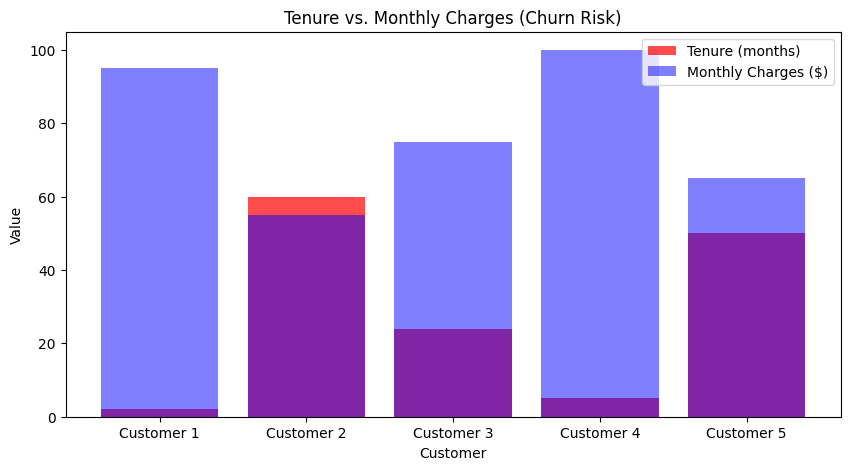

In [163]:
tenure = [2, 60, 24, 5, 50]
monthly_charges = [95, 55, 75, 100, 65]
labels = ["Customer 1", "Customer 2", "Customer 3", "Customer 4", "Customer 5"]
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(labels, tenure, color='red', label="Tenure (months)", alpha=0.7)
ax.bar(labels, monthly_charges, color='blue', label="Monthly Charges ($)", alpha=0.5)
ax.set_xlabel("Customer")
ax.set_ylabel("Value")
ax.set_title("Tenure vs. Monthly Charges (Churn Risk)")
ax.legend()
plt.show()


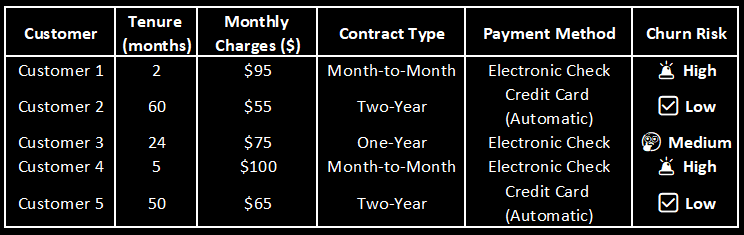

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

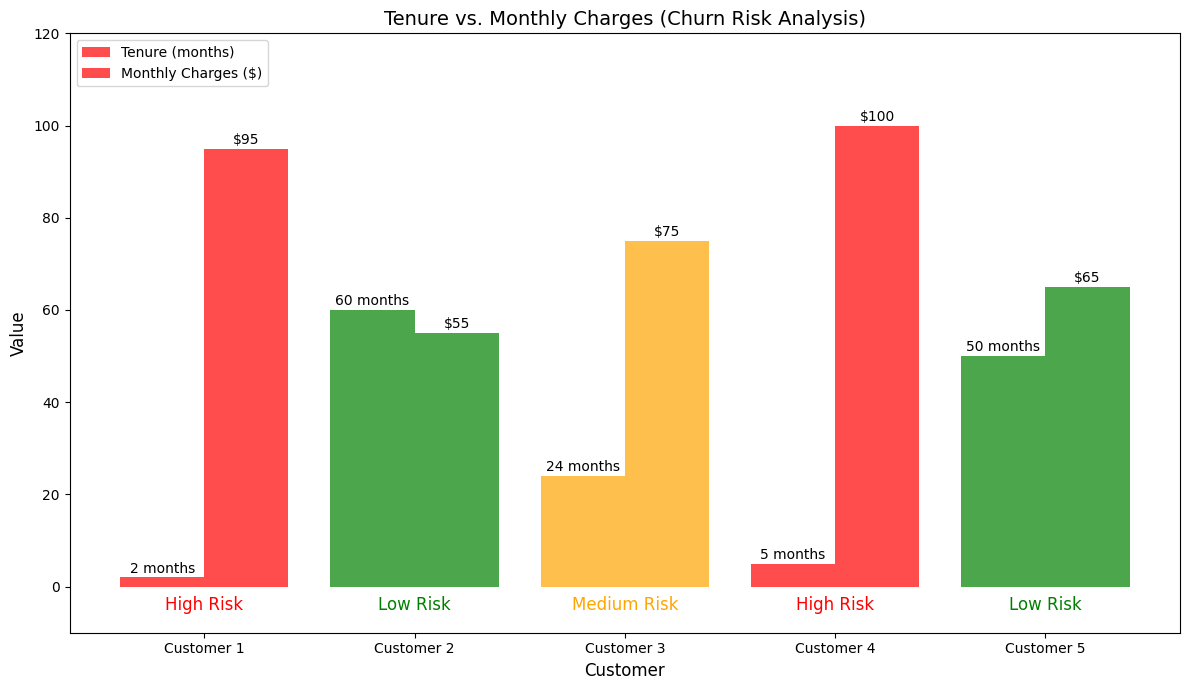

In [122]:
customers = ["Customer 1", "Customer 2", "Customer 3", "Customer 4", "Customer 5"]
tenure = [2, 60, 24, 5, 50]  # Number of months
monthly_charges = [95, 55, 75, 100, 65]  # Monthly charges in dollars
churn_risk = ["High Risk", "Low Risk", "Medium Risk", "High Risk", "Low Risk"]  # Churn risks

risk_colors = {
    "High Risk": "red",
    "Medium Risk": "orange",
    "Low Risk": "green"
}
bar_colors = [risk_colors[risk] for risk in churn_risk]
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.4  # Adjust width of bars for readability

x = np.arange(len(customers))

bar1 = ax.bar(x - bar_width/2, tenure, bar_width, color=bar_colors, alpha=0.7, label="Tenure (months)")
bar2 = ax.bar(x + bar_width/2, monthly_charges, bar_width, color=bar_colors, alpha=0.7, label="Monthly Charges ($)")

for i, bar in enumerate(bar1):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{tenure[i]} months", ha='center', fontsize=10, color='black')

for i, bar in enumerate(bar2):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"${monthly_charges[i]}", ha='center', fontsize=10, color='black')

for i, label in enumerate(churn_risk):
    ax.text(x[i], -5, f"{label}", ha='center', fontsize=12, color=risk_colors[label])

ax.set_xlabel("Customer", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Tenure vs. Monthly Charges (Churn Risk Analysis)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(customers)
ax.legend(["Tenure (months)", "Monthly Charges ($)"], loc="upper left")

plt.tight_layout()
plt.ylim(-10, max(monthly_charges) + 20)  # Adjust y-axis for churn labels
plt.show()


# 📊 Churn Prediction Analysis



### **🔹 Insights**
1. **Short-tenure and high-billing customers** (e.g., Customer 1 & Customer 4) have the **highest churn risk**.  
   - These customers are more likely to leave due to **short engagement periods and high costs**.  
2. Customers with **Month-to-Month contracts** churn more often compared to customers with long-term contracts.  
   - Offering discounts or incentives for annual contracts can reduce churn.  
3. **Electronic Check payments** correlate strongly with churn risk, as seen with Customers 1, 3, and 4.  
   - Businesses can encourage customers to switch to more secure payment methods like Credit Card (Automatic).  
4. **Long-term contract customers** (e.g., Customer 2 & Customer 5) are highly stable and loyal.  


<ipython-input-123-4191d423e05e>:40: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-123-4191d423e05e>:40: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-123-4191d423e05e>:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-123-4191d423e05e>:40: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabt

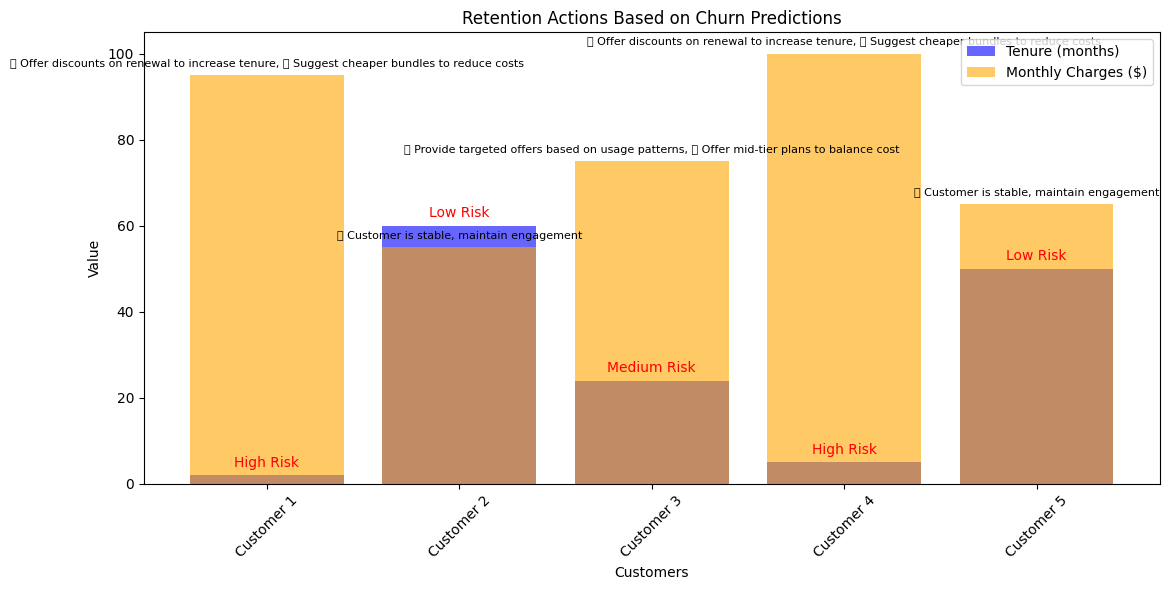

,Customer,Tenure (months),Monthly Charges ($),Churn Prediction,Retention Actions
0,Customer 1,2,95,High Risk,🚀 Offer discounts on renewal to increase tenur...
1,Customer 2,60,55,Low Risk,"✅ Customer is stable, maintain engagement"
2,Customer 3,24,75,Medium Risk,🤝 Provide targeted offers based on usage patte...
3,Customer 4,5,100,High Risk,🚀 Offer discounts on renewal to increase tenur...
4,Customer 5,50,65,Low Risk,"✅ Customer is stable, maintain engagement"


In [123]:
scenarios = pd.DataFrame({
    "Customer": ["Customer 1", "Customer 2", "Customer 3", "Customer 4", "Customer 5"],
    "Tenure (months)": [2, 60, 24, 5, 50],
    "Monthly Charges ($)": [95, 55, 75, 100, 65],
    "Churn Prediction": ["High Risk", "Low Risk", "Medium Risk", "High Risk", "Low Risk"]
})

def retention_logic(row):
    actions = []
    if row["Churn Prediction"] == "High Risk":
        if row["Tenure (months)"] < 6:
            actions.append("🚀 Offer discounts on renewal to increase tenure")
        if row["Monthly Charges ($)"] > 70:
            actions.append("💡 Suggest cheaper bundles to reduce costs")
    elif row["Churn Prediction"] == "Medium Risk":
        actions.append("🤝 Provide targeted offers based on usage patterns")
        if row["Monthly Charges ($)"] > 70:
            actions.append("💡 Offer mid-tier plans to balance cost")
    elif row["Churn Prediction"] == "Low Risk":
        actions.append("✅ Customer is stable, maintain engagement")
    return ", ".join(actions)

scenarios["Retention Actions"] = scenarios.apply(retention_logic, axis=1)
scenarios.to_csv("scenario_based_retention.csv", index=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(scenarios["Customer"], scenarios["Tenure (months)"], label="Tenure (months)", alpha=0.6, color="blue")
ax.bar(scenarios["Customer"], scenarios["Monthly Charges ($)"], label="Monthly Charges ($)", alpha=0.6, color="orange")

for idx, row in scenarios.iterrows():
    ax.text(idx, row["Tenure (months)"] + 2, row["Churn Prediction"], ha="center", fontsize=10, color="red")
    ax.text(idx, row["Monthly Charges ($)"] + 2, row["Retention Actions"], ha="center", fontsize=8, wrap=True)

ax.set_title("Retention Actions Based on Churn Predictions")
ax.set_xlabel("Customers")
ax.set_ylabel("Value")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

scenarios


In [124]:
import plotly.graph_objects as go

scenarios = pd.DataFrame({
    "Customer": ["Customer 1", "Customer 2", "Customer 3", "Customer 4", "Customer 5"],
    "Tenure (months)": [2, 60, 24, 5, 50],
    "Monthly Charges ($)": [95, 55, 75, 100, 65],
    "Churn Prediction": ["High Risk", "Low Risk", "Medium Risk", "High Risk", "Low Risk"]
})

def retention_logic(row):
    actions = []
    if row["Churn Prediction"] == "High Risk":
        if row["Tenure (months)"] < 6:
            actions.append("🚀 Offer discounts on renewal to increase tenure")
        if row["Monthly Charges ($)"] > 70:
            actions.append("💡 Suggest cheaper bundles to reduce costs")
    elif row["Churn Prediction"] == "Medium Risk":
        actions.append("🤝 Provide targeted offers based on usage patterns")
        if row["Monthly Charges ($)"] > 70:
            actions.append("💡 Offer mid-tier plans to balance cost")
    elif row["Churn Prediction"] == "Low Risk":
        actions.append("✅ Customer is stable, maintain engagement")
    return ", ".join(actions)


scenarios["Retention Actions"] = scenarios.apply(retention_logic, axis=1)
risk_colors = {
    "High Risk": "red",
    "Medium Risk": "orange",
    "Low Risk": "green"
}

scenarios["Risk Color"] = scenarios["Churn Prediction"].map(risk_colors)
fig = go.Figure()

fig.add_trace(go.Bar(
    x=scenarios["Customer"],
    y=scenarios["Tenure (months)"],
    name="Tenure (months)",
    text=scenarios["Tenure (months)"],
    textposition="outside",
    marker_color=scenarios["Risk Color"],
    hoverinfo="text",
    hovertext=scenarios.apply(lambda row: f"Customer: {row['Customer']}<br>Tenure: {row['Tenure (months)']} months<br>Risk: {row['Churn Prediction']}<br>Actions: {row['Retention Actions']}", axis=1)
))

fig.add_trace(go.Bar(
    x=scenarios["Customer"],
    y=scenarios["Monthly Charges ($)"],
    name="Monthly Charges ($)",
    text=scenarios["Monthly Charges ($)"],
    textposition="outside",
    marker_color=scenarios["Risk Color"],
    opacity=0.7,
    hoverinfo="text",
    hovertext=scenarios.apply(lambda row: f"Customer: {row['Customer']}<br>Monthly Charges: ${row['Monthly Charges ($)']}<br>Risk: {row['Churn Prediction']}<br>Actions: {row['Retention Actions']}", axis=1)
))

fig.update_layout(
    title="Customer Retention Analysis: Tenure vs Monthly Charges with Retention Logic",
    xaxis_title="Customer",
    yaxis_title="Value",
    barmode="group",
    legend_title="Legend",
    showlegend=True,
    template="plotly_white",
    annotations=[
        dict(
            x=scenarios.iloc[i]["Customer"],
            y=scenarios.iloc[i]["Tenure (months)"] + 5,
            text=f"{scenarios.iloc[i]['Churn Prediction']}<br>{scenarios.iloc[i]['Retention Actions']}",
            showarrow=False,
            font=dict(color=scenarios.iloc[i]["Risk Color"], size=10),
            align="center"
        ) for i in range(len(scenarios))
    ]
)


fig.show()
scenarios[["Customer", "Tenure (months)", "Monthly Charges ($)", "Churn Prediction", "Retention Actions"]]

,Customer,Tenure (months),Monthly Charges ($),Churn Prediction,Retention Actions
0,Customer 1,2,95,High Risk,🚀 Offer discounts on renewal to increase tenur...
1,Customer 2,60,55,Low Risk,"✅ Customer is stable, maintain engagement"
2,Customer 3,24,75,Medium Risk,🤝 Provide targeted offers based on usage patte...
3,Customer 4,5,100,High Risk,🚀 Offer discounts on renewal to increase tenur...
4,Customer 5,50,65,Low Risk,"✅ Customer is stable, maintain engagement"
